In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import h5py
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tabulate import tabulate


# Generate synthetic data for demonstration
random_seed = 42
# Define the desired sample size for each category
num_samples_per_category = 50000

# Generate data with labels for each category
data = {
    'Platelet_Count': [],
    'Cirrhosis_Label': []
}

# Generate 500 samples for each category
for cirrhosis_label in [0, 1, 2]:
    for _ in range(num_samples_per_category):
        # For healthy samples (label 0), platelet count is within the healthy range
        if cirrhosis_label == 0:
            platelet_count = random.randint(150000, 450000)
        # For cirrhosis samples (label 1), platelet count is between 50,000 and 149,999
        elif cirrhosis_label == 1:
            platelet_count = random.randint(50000, 149999)
        # For severe cirrhosis samples (label 2), platelet count is below 50,000
        else:
            platelet_count = random.randint(1, 49999)
        
        # Append the data to the lists
        data['Platelet_Count'].append(platelet_count)
        data['Cirrhosis_Label'].append(cirrhosis_label)

# Create a DataFrame from the synthetic data
df = pd.DataFrame(data)

# Separate the feature (Xi) and the target variable (Wi)
X = df[['Platelet_Count']]
y = df['Cirrhosis_Label']
y_encoded = to_categorical(y, num_classes=3)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




Epoch 1/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0135 - val_accuracy: 0.9959
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0141 - accuracy: 0.9949 - val_loss: 0.0232 - val_accuracy: 0.9875
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0117 - accuracy: 0.9955 - val_loss: 0.0192 - val_accuracy: 0.9914
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0107 - accuracy: 0.9954 - val_loss: 0.0076 - val_accuracy: 0.9965
Epoch 5/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0107 - accuracy: 0.9955 - val_loss: 0.0081 - val_accuracy: 0.9964
Epoch 6/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0096 - accuracy: 0.9962 - val_loss: 0.0175 - val_accuracy: 0.9925
Epoch 7/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0094 - accuracy: 0.9961 - val_loss: 0.0047 - val_accuracy:

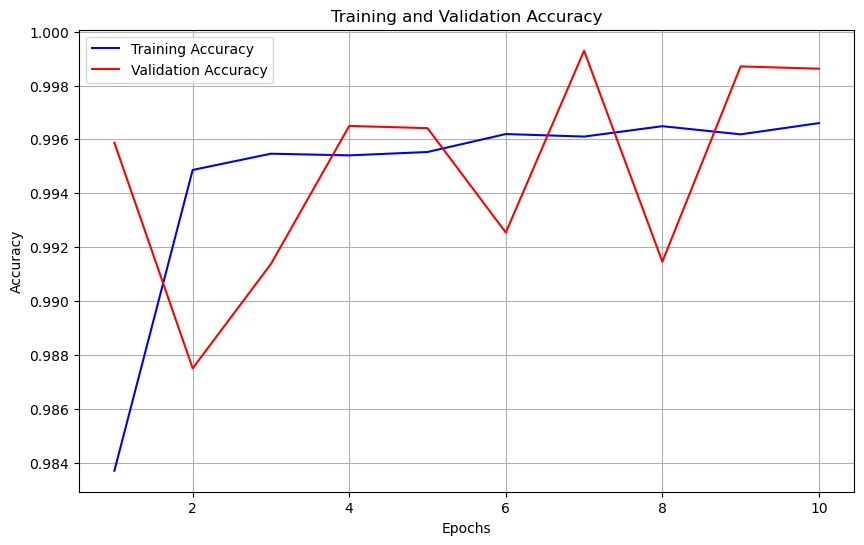

In [3]:


# Create a simple neural network model
model = keras.Sequential([
    layers.Input(shape=(1,)),  # Input layer
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    layers.Dense(64, activation='relu'),   # Hidden layer with 64 units and ReLU activation
    layers.Dense(y_train.shape[1], activation='softmax')  # Output layer with 3 units and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Extract training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Create empty lists to store training information
iterations = []
times_elapsed = []
mini_batch_accuracies = []
validation_accuracies = []
mini_batch_losses = []
validation_losses = []
learning_rates = []

# Initialize base learning rate
base_learning_rate = 0.001

# Train the model and collect training information
for epoch in range(1, 11):
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=0)
    end_time = time.time()
    
    # Extract training metrics
    train_accuracy = history.history['accuracy'][0] * 100  # Convert to percentage
    val_accuracy = history.history['val_accuracy'][0] * 100  # Convert to percentage
    train_loss = round(history.history['loss'][0], 2)  # Round to 2 decimal places
    val_loss = round(history.history['val_loss'][0], 2)  # Round to 2 decimal places
    
    # Append training information to the lists
    iterations.append(epoch)
    times_elapsed.append(f"{round(end_time - start_time, 2)}s")
    mini_batch_accuracies.append(f"{round(train_accuracy, 2)}%")  # Round to 2 decimal places
    validation_accuracies.append(f"{round(val_accuracy, 2)}%")  # Round to 2 decimal places
    mini_batch_losses.append(train_loss)
    validation_losses.append(val_loss)
    learning_rates.append(f"{base_learning_rate * 100}%")  # Convert to percentage

# Create a DataFrame from the collected training information
columns = ['Epoch', 'Time Elapsed', 'Mini-Batch Accuracy', 'Validation Accuracy', 'Mini-Batch Loss', 'Validation Loss', 'Base Learning Rate']
training_df = pd.DataFrame(list(zip(iterations, times_elapsed, mini_batch_accuracies, validation_accuracies, mini_batch_losses, validation_losses, learning_rates)), columns=columns)

# Convert the DataFrame to a nicely formatted table using tabulate
table = tabulate(training_df, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)

+-------+--------------+---------------------+---------------------+-----------------+-----------------+--------------------+
| Epoch | Time Elapsed | Mini-Batch Accuracy | Validation Accuracy | Mini-Batch Loss | Validation Loss | Base Learning Rate |
+-------+--------------+---------------------+---------------------+-----------------+-----------------+--------------------+
|   1   |    2.88s     |       99.82%        |       99.89%        |       0.0       |       0.0       |        0.1%        |
|   2   |    2.18s     |       99.83%        |       99.77%        |       0.0       |      0.01       |        0.1%        |
|   3   |    2.08s     |       99.83%        |       99.62%        |       0.0       |      0.01       |        0.1%        |
|   4   |     2.1s     |       99.81%        |       99.94%        |       0.0       |       0.0       |        0.1%        |
|   5   |    2.08s     |        99.8%        |       99.37%        |       0.0       |      0.01       |        0.1%  

In [6]:
print(df)

        Platelet_Count  Cirrhosis_Label
0               219424                0
1               219435                0
2               423214                0
3               277587                0
4               222925                0
...                ...              ...
149995           12684                2
149996           18121                2
149997           40072                2
149998           26637                2
149999           10660                2

[150000 rows x 2 columns]


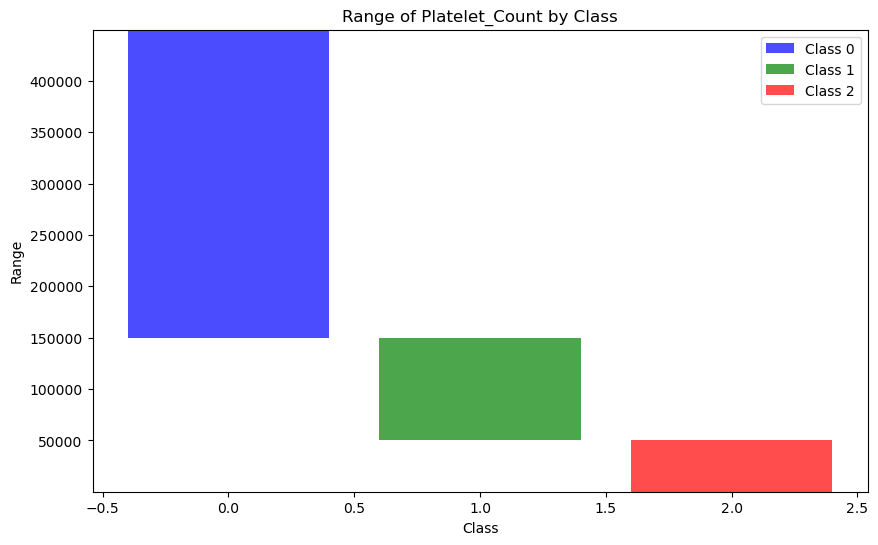

In [9]:
# Separate the dataset into classes based on the target column
classes = df['Cirrhosis_Label'].unique()

# Calculate the minimum and maximum Platelet_Count for each class
class_ranges = []
for class_label in classes:
    class_data = df[df['Cirrhosis_Label'] == class_label]
    min_range = class_data['Platelet_Count'].min()
    max_range = class_data['Platelet_Count'].max()
    class_ranges.append((min_range, max_range))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define colors for the bars
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Extract the minimum and maximum values for the y-axis
y_min = min([min_range for min_range, _ in class_ranges])
y_max = max([max_range for _, max_range in class_ranges])

# Create the bar chart with error bars to represent the range
for i, (min_range, max_range) in enumerate(class_ranges):
    plt.bar(classes[i], max_range - min_range, bottom=min_range, color=colors[i % len(colors)],
            label=f'Class {classes[i]}', alpha=0.7)

# Customize plot labels and title
plt.xlabel('Class')
plt.ylabel('Range')
plt.title('Range of Platelet_Count by Class')

# Set y-axis limits to include the entire range
plt.ylim(y_min, y_max)

# Show the plot
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on new data
new_data = np.array([[240000]])  # Replace with your own data points
new_data = scaler.transform(new_data)  # Standardize the new data, assuming you used StandardScaler

# Predict the class probabilities for the new data
class_probabilities = model.predict(new_data)

# To get the predicted class labels (argmax of class probabilities)
predicted_labels = np.argmax(class_probabilities, axis=1)

# Define the true class label for the new data point
true_label = 1  # Replace with the true class label of your new data point

# Print the predicted class label
class_names = ['Healthy', 'Liver Cirrhosis', 'Severe Condition']
print("Predicted Class Label:", class_names[predicted_labels[0]])

# Print the true class label
print("True Class Label:", true_label)

# Print the classification report

report = classification_report([true_label], [predicted_labels[0]], target_names=class_names, labels=[0, 1, 2])
print("Classification Report:\n", report)

# Print the confusion matrix
conf_matrix = confusion_matrix([true_label], [predicted_labels[0]])
print("Confusion Matrix:\n", conf_matrix)
